## STAT 441 Notebook

lorem ipsum placeholder blurb, let's replace with a quick description later

Jaemin, Grace

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing & Loading Data

In [11]:
# Datasets
education_train = pd.read_csv("module_Education_train_set.csv")
household_train = pd.read_csv("module_HouseholdInfo_train_set.csv")
subjective_poverty_train = pd.read_csv("module_SubjectivePoverty_train_set.csv")

## 2. EDA

### 2.1 Education Dataset

In [62]:
print("\nSample Rows from Education Dataset:")
education_train.head()


Sample Rows from Education Dataset:


,psu,hh,idcode,q01,q02,q03,q04,q05,q06,q07,...,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66
0,2,8,3,1,1,1,2.0,3.0,3.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0
1,3,8,4,1,1,1,2.0,2.0,2.0,0.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0
2,6,5,3,1,1,1,2.0,3.0,3.0,0.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,4.0
3,7,7,3,1,1,1,6.0,1.0,3.0,0.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,6.0
4,16,2,4,1,1,1,5.0,3.0,2.0,4.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0


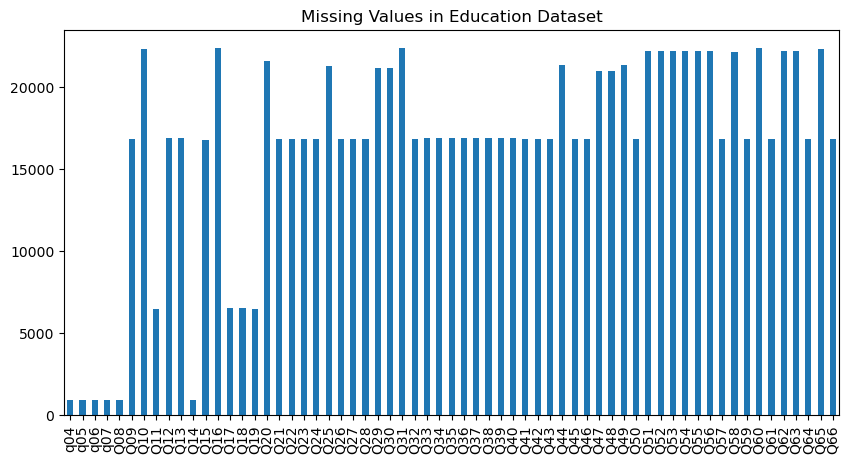

In [107]:
# Visualize missing values
plt.figure(figsize=(10, 5))
education_missing[education_missing > 0].plot(kind="bar")
plt.title("Missing Values in Education Dataset")
plt.show()

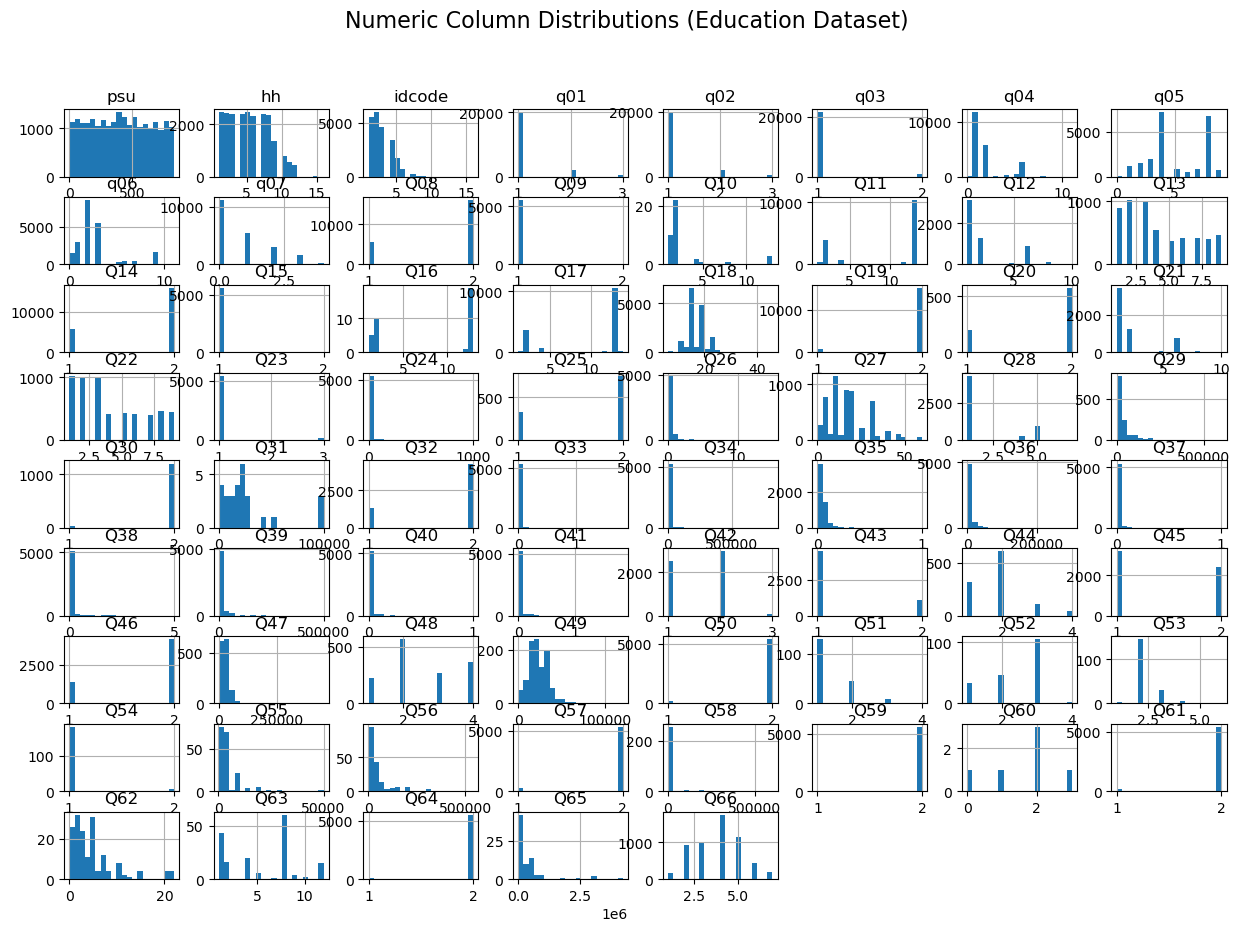

In [109]:
# Distribution of numeric columns
numeric_education = education_train.select_dtypes(include=["float64", "int64"])
numeric_education.hist(figsize=(15, 10), bins=20)
plt.suptitle("Numeric Column Distributions (Education Dataset)", fontsize=16)
plt.show()

### 2.2 Households

In [65]:
print("\nSample Rows from Household Dataset:")
household_train.head()


Sample Rows from Household Dataset:


,psu,hh,idcode,hhid,q02,q03,q04,q05y,q05m,q06,...,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,1,2,1,102,1,1,19600711,52,1,1.0,...,3.0,2.0,80.0,NaN,2,NaN,3.0,2.0,80.0,NaN
1,1,2,2,102,2,2,19650225,47,6,1.0,...,3.0,2.0,67.0,NaN,2,NaN,3.0,2.0,74.0,NaN
2,1,3,1,103,1,1,19540203,58,7,1.0,...,2.0,2.0,85.0,NaN,2,NaN,2.0,2.0,67.0,NaN
3,1,3,2,103,2,2,19560602,56,3,1.0,...,2.0,2.0,67.0,NaN,2,NaN,2.0,2.0,67.0,NaN
4,1,3,3,103,1,4,19850825,27,0,5.0,...,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN


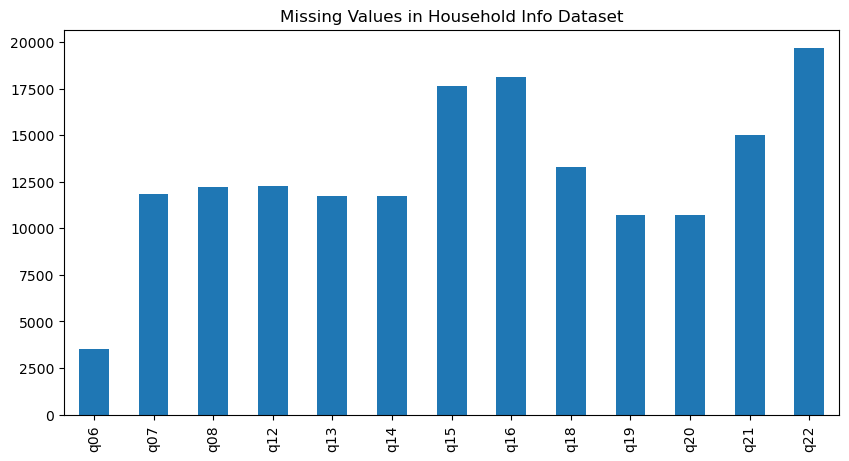

In [105]:
# Missing values
plt.figure(figsize=(10, 5))
household_missing[household_missing > 0].plot(kind="bar")
plt.title("Missing Values in Household Info Dataset")
plt.show()

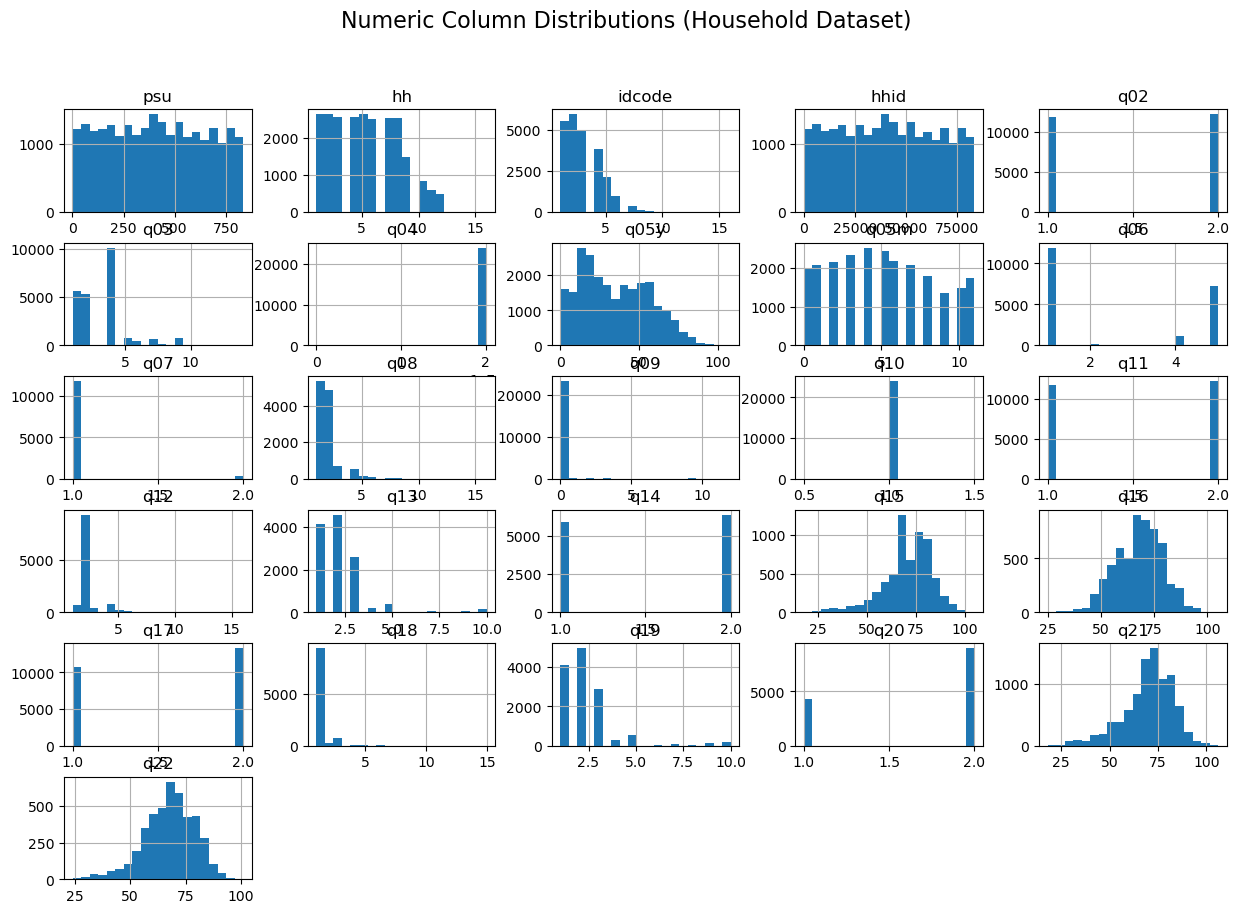

In [53]:
# Key features: Histogram
numeric_household = household_train.select_dtypes(include=["float64", "int64"])
numeric_household.hist(figsize=(15, 10), bins=20)
plt.suptitle("Numeric Column Distributions (Household Dataset)", fontsize=16)
plt.show()

### 2.3 Subjective Poverty

In [42]:
print("\nSample Rows from Subjective Poverty Dataset:")
subjective_poverty_train.head()


Sample Rows from Subjective Poverty Dataset:


,psu_hh_idcode,subjective_poverty_1,subjective_poverty_2,subjective_poverty_3,subjective_poverty_4,subjective_poverty_5,subjective_poverty_6,subjective_poverty_7,subjective_poverty_8,subjective_poverty_9,subjective_poverty_10
0,30_8_1,0,0,0,1,0,0,0,0,0,0
1,194_1_2,1,0,0,0,0,0,0,0,0,0
2,224_6_1,0,0,1,0,0,0,0,0,0,0
3,323_10_1,0,0,0,0,1,0,0,0,0,0
4,428_10_1,0,0,0,1,0,0,0,0,0,0


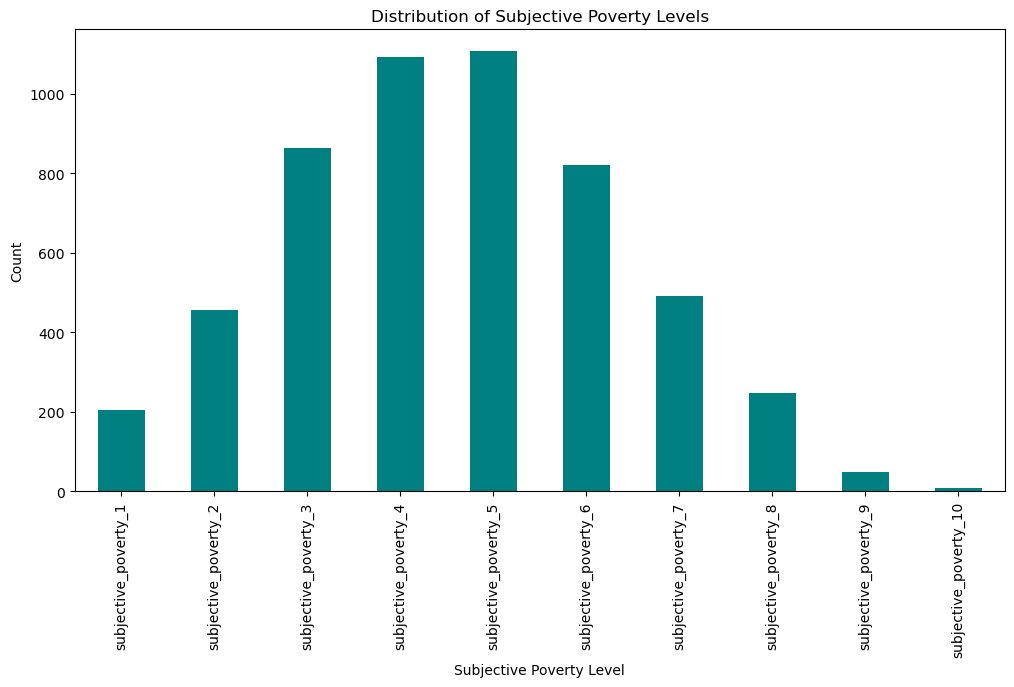

In [44]:
# Class distribution
poverty_levels = subjective_poverty_train.iloc[:, 1:].sum()
plt.figure(figsize=(12, 6))
poverty_levels.plot(kind="bar", color="teal")
plt.title("Distribution of Subjective Poverty Levels")
plt.xlabel("Subjective Poverty Level")
plt.ylabel("Count")
plt.show()

## 3. Preprocessing

### 3.1 Data Merging

In [81]:
education_train["psu_hh_idcode"] = education_train["psu"].astype(str) + "_" + \
                                   education_train["hh"].astype(str) + "_" + \
                                   education_train["idcode"].astype(str)

household_train["psu_hh_idcode"] = household_train["psu"].astype(str) + "_" + \
                                    household_train["hh"].astype(str) + "_" + \
                                    household_train["idcode"].astype(str)

merged_data = subjective_poverty_train.merge(education_train, on="psu_hh_idcode", how="left")
merged_data = merged_data.merge(household_train, on="psu_hh_idcode", how="left")

print("\n=== Merged Dataset Info ===")
merged_data.head()


=== Merged Dataset Info ===


,psu_hh_idcode,subjective_poverty_1,subjective_poverty_2,subjective_poverty_3,subjective_poverty_4,subjective_poverty_5,subjective_poverty_6,subjective_poverty_7,subjective_poverty_8,subjective_poverty_9,...,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,30_8_1,0,0,0,1,0,0,0,0,0,...,2.0,1.0,NaN,66.0,2.0,NaN,3.0,1.0,NaN,63.0
1,194_1_2,1,0,0,0,0,0,0,0,0,...,1.0,1.0,NaN,67.0,2.0,NaN,1.0,1.0,NaN,75.0
2,224_6_1,0,0,1,0,0,0,0,0,0,...,1.0,2.0,86.0,NaN,2.0,NaN,1.0,2.0,74.0,NaN
3,323_10_1,0,0,0,0,1,0,0,0,0,...,2.0,2.0,81.0,NaN,2.0,NaN,2.0,2.0,77.0,NaN
4,428_10_1,0,0,0,1,0,0,0,0,0,...,1.0,2.0,80.0,NaN,2.0,NaN,1.0,2.0,72.0,NaN


### 3.2 Preprocessing

In [112]:
# Handle numeric columns
# I did mean imputation here to start, but we can change that!
numeric_data = merged_data.select_dtypes(include=['number'])
merged_data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

# Handle non-numeric columns
# just filling NaNs with "unknowns" temporily
non_numeric_columns = merged_data.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    merged_data[col].fillna('Unknown', inplace=True)

merged_data.head(20)

C:\Users\Jaemin\AppData\Local\Temp\ipykernel_21340\2230788501.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna('Unknown', inplace=True)


,psu_hh_idcode,subjective_poverty_1,subjective_poverty_2,subjective_poverty_3,subjective_poverty_4,subjective_poverty_5,subjective_poverty_6,subjective_poverty_7,subjective_poverty_8,subjective_poverty_9,...,q09,q10,q11,q13,q14,q15,q17,q19,q20,q21
0,30_8_1,0,0,0,1,0,0,0,0,0,...,0.0,1.0,2.0,2.000000,1.000000,72.260776,2.0,3.000000,1.000000,71.245919
1,194_1_2,1,0,0,0,0,0,0,0,0,...,0.0,1.0,2.0,1.000000,1.000000,72.260776,2.0,1.000000,1.000000,71.245919
2,224_6_1,0,0,1,0,0,0,0,0,0,...,0.0,1.0,2.0,1.000000,2.000000,86.000000,2.0,1.000000,2.000000,74.000000
3,323_10_1,0,0,0,0,1,0,0,0,0,...,0.0,1.0,2.0,2.000000,2.000000,81.000000,2.0,2.000000,2.000000,77.000000
4,428_10_1,0,0,0,1,0,0,0,0,0,...,0.0,1.0,2.0,1.000000,2.000000,80.000000,2.0,1.000000,2.000000,72.000000
5,809_6_2,0,0,1,0,0,0,0,0,0,...,0.0,1.0,2.0,3.000000,1.000000,72.260776,2.0,2.000000,1.000000,71.245919
6,138_2_1,0,0,0,0,1,0,0,0,0,...,0.0,1.0,2.0,3.000000,1.000000,72.260776,2.0,3.000000,2.000000,77.000000
7,329_1_1,0,1,0,0,0,0,0,0,0,...,0.0,1.0,2.0,1.000000,2.000000,65.000000,2.0,1.000000,2.000000,80.000000
8,409_8_1,0,0,0,1,0,0,0,0,0,...,0.0,1.0,2.0,1.000000,1.000000,72.260776,2.0,1.000000,1.000000,71.245919
9,186_4_2,0,0,0,0,1,0,0,0,0,...,0.0,1.0,2.0,1.000000,1.000000,72.260776,2.0,1.000000,1.000000,71.245919


## 4. Model Training